## Lesson 2 homework, Task about lakes

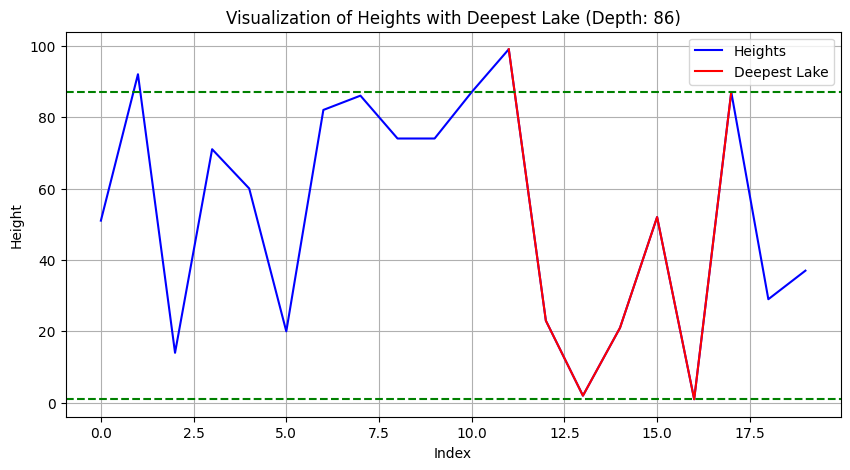

lake_start:	 11 
lake_end:	 17 
max_depth:	 86


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
random_values = np.random.randint(0, 101, 20)


def find_deepest_lake(heights):
    """Function to find the deepest lake."""
    n = len(heights)
    max_depth = 0
    best_lake = (0, 0)

    for left in range(n):
        for right in range(left + 2, n):
            if heights[right] < heights[left]: 
                continue

            if heights[left] == heights[right]:
                if heights[left+1] > heights[left]:
                    left = left+1

            min_inner = min(heights[left + 1:right])
            depth = min(heights[left], heights[right]) - min_inner

            if depth > max_depth:
                max_depth = depth
                best_lake = (left, right)

    return best_lake, max_depth


def vizualize(lake_start, lake_end, max_depth, random_values):
    """Make a plot of computed deepest lake on defined random_values."""
    x_values = np.arange(len(random_values))

    plt.figure(figsize=(10, 5))
    plt.plot(x_values, random_values, linestyle='-', color='b', label="Heights")

    plt.plot(x_values[lake_start:lake_end+1], random_values[lake_start:lake_end+1], linestyle='-', color='r', label="Deepest Lake")

    upper_bound = min(random_values[lake_start], random_values[lake_end])
    plt.axhline(upper_bound, color='green', linestyle='dashed')

    min_inner = min(random_values[lake_start+1:lake_end])
    plt.axhline(min_inner, color='green', linestyle='dashed')

    plt.xlabel("Index")
    plt.ylabel("Height")
    plt.title(f"Visualization of Heights with Deepest Lake (Depth: {max_depth})")

    plt.grid(True)
    plt.legend()

    plt.show()


(lake_start, lake_end), max_depth = find_deepest_lake(random_values)
vizualize(lake_start, lake_end, max_depth, random_values)
print("lake_start:\t", lake_start, "\nlake_end:\t", lake_end, "\nmax_depth:\t", max_depth)

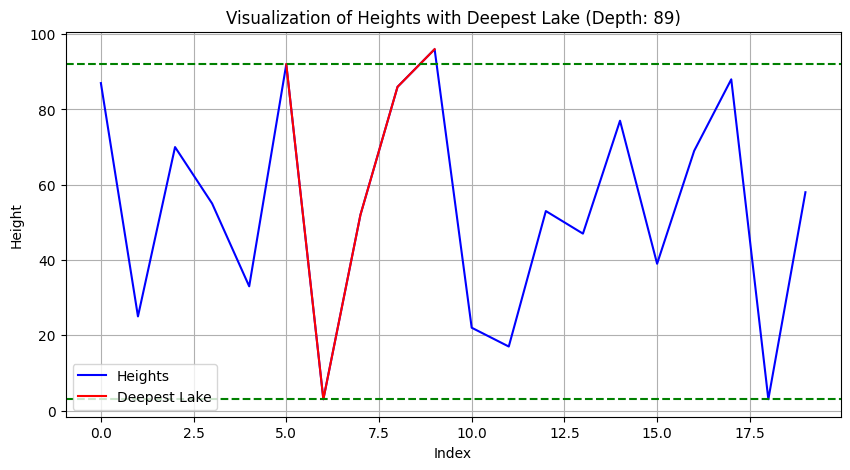

lake_start:	 5 
lake_end:	 9 
max_depth:	 89


In [2]:
np.random.seed(2023)
random_values = np.random.randint(0, 101, 20)

(lake_start, lake_end), max_depth = find_deepest_lake(random_values)
vizualize(lake_start, lake_end, max_depth, random_values)
print("lake_start:\t", lake_start, "\nlake_end:\t", lake_end, "\nmax_depth:\t", max_depth)

### Task about sum and product

In [3]:
def find_valid_pairs():
    """
    Step 1: 'Prod: I don't know the numbers.'
    Finds all valid pairs (a, b) where 1 < a, b < 100, ensuring that their product (P) has multiple factorizations.
    This ensures that "Prod" cannot immediately determine the numbers.
    """
    valid_pairs = []
    
    for a in range(2, 100):
        for b in range(a, 100):
            S = a + b
            P = a * b
            
            factor_pairs = []
            for x in range(2, int(P**0.5) + 1):
                if P % x == 0:
                    y = P // x
                    if 2 <= y < 100:
                        factor_pairs.append((x, y))
            
            if len(factor_pairs) < 2:
                continue
            
            valid_pairs.append((a, b, S, P))
    
    return valid_pairs

def filter_by_sum(valid_pairs):
    """
    Step 2: 'Sum: I know it.'
    Filters sums (S) that uniquely determine a pair (a, b). This ensures that "Sum" can deduce the numbers.
    """
    possible_sums = {}
    
    for a, b, S, P in valid_pairs:
        if S not in possible_sums:
            possible_sums[S] = []
        possible_sums[S].append((a, b, P))
    
    unique_sums = {}
    for S, pairs in possible_sums.items():
        if len(pairs) == 1:
            unique_sums[S] = pairs[0]
    
    return unique_sums

In [4]:
# Step 1: 'Prod: I don't know the numbers.'
valid_pairs = find_valid_pairs()

# Step 2: 'Sum: I know it.'
unique_sums = filter_by_sum(valid_pairs)

# Step 3: 'Prod: then I know the numbers.'
for a, b, S, P in valid_pairs:
    if S in unique_sums and unique_sums[S] == (a, b, P):
        print(f"The numbers are: a = {a}, b = {b}")
        break

# Step 4: 'Sum: then I know the numbers too.'
# At this stage Sum confirms his previous thought, so no further evaluation is needed.

The numbers are: a = 3, b = 4
